In [8]:
import random
import string
import numpy as np
import matplotlib.pyplot as plt
from hllpp import *
from utils import *

# K-Anominity to Number of Unique Patients

holding total number of patients and other HLL parameters constant, in sparse only, then in dense only, using nodes and aggregator

In [2]:
K = 10
P = 10
P_PRIME = 25
N_HOSPITALS = 2

In [3]:
p_non_k = []
h1_p_non_k = []
h2_p_non_k = []

for n_unique in range(1000, 9000, 1000):
    h1, h2 = get_hospital_hlls(10000, n_unique, N_HOSPITALS, P, P_PRIME)
    h1_p_non_k.append(h1.proportion_not_k_anonymous(K))
    h2_p_non_k.append(h2.proportion_not_k_anonymous(K))
    aggregator = HyperLogLogPlusPlus(P, P_PRIME)
    aggregator.aggregate(h1)
    aggregator.aggregate(h2)
    proportion = aggregator.proportion_not_k_anonymous(K)
    p_non_k.append(proportion)


575
582
254
837
835
744
933
933
912
977
971
966
993
984
1003
990
994
1016
995
1006
1019
1016
1009
1023


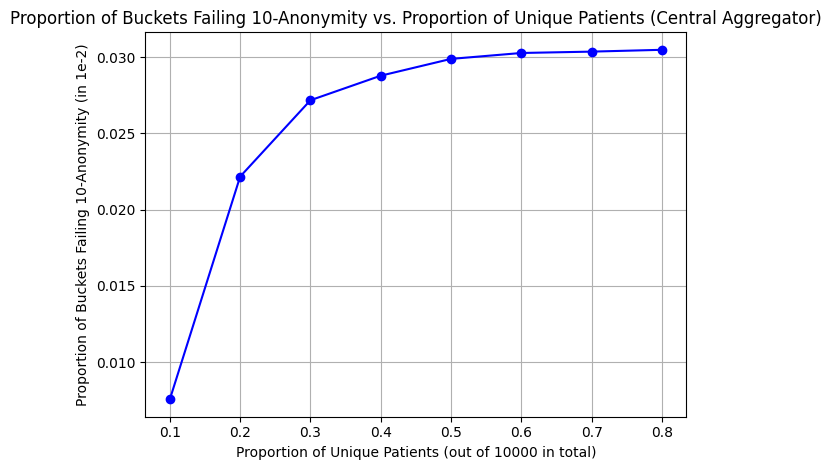

In [21]:
# plt.figure(figsize=(8, 5))
plt.plot(np.array(range(1000, 9000, 1000))/10000, np.array(p_non_k)*1000, marker='o', linestyle='-', color='b')
plt.title("Proportion of Buckets Failing 10-Anonymity vs. Proportion of Unique Patients (Central Aggregator)")
plt.xlabel("Proportion of Unique Patients (out of 10000 in total)")
plt.ylabel("Proportion of Buckets Failing 10-Anonymity (in 1e-2)")
plt.grid(True)
plt.tight_layout()
plt.show()

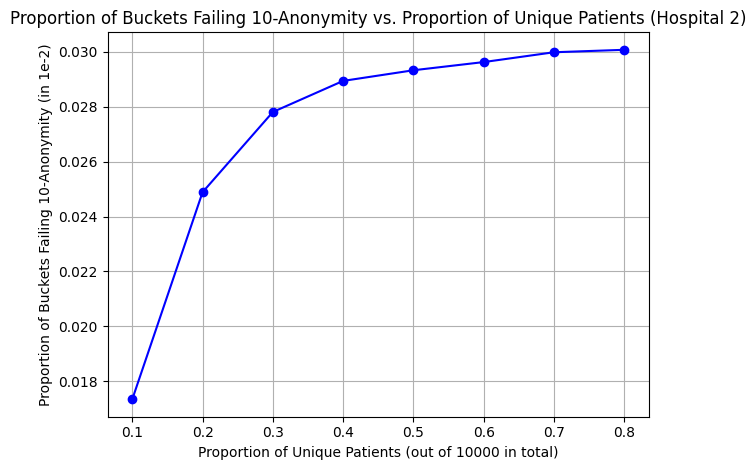

In [23]:
plt.plot(np.array(range(1000, 9000, 1000))/10000, np.array(h2_p_non_k)*1000, marker='o', linestyle='-', color='b')
plt.title("Proportion of Buckets Failing 10-Anonymity vs. Proportion of Unique Patients (Hospital 2)")
plt.xlabel("Proportion of Unique Patients (out of 10000 in total)")
plt.ylabel("Proportion of Buckets Failing 10-Anonymity (in 1e-2)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Removing Patient To See Distribution Change

In [ ]:
unique_patients_total = 7000
patients_total = 10000
patients_all = generate_patients_with_duplicates(unique_patients_total, patients_total, 10)